<a href="https://colab.research.google.com/github/datadigger01/datamining/blob/main/model_regression_seoulbike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# prompt:  github에 링크되어 있는 csv파일 직접 읽어 올 수 있는 코드를 제공해주세요

# github에 있는 csv 파일 직접 읽어오기
# - https://github.com/datadigger01/datamining/blob/main/DATA/df_final.csv

url = 'https://raw.githubusercontent.com/datadigger01/datamining/main/DATA/SeoulBikeData.csv'

df = pd.read_csv(url, encoding='latin-1')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
# prompt: df DataFrame 사용: df 데이터셋의 컬럼명을 일괄로 바꿀 수 있는 코드를 제공해주세요

# 컬럼명을 변경하기 위한 딕셔너리를 생성합니다.
new_columns = {
    'Date': 'date',
    'Rented Bike Count': 'rented_bike_count',
    'Hour': 'hour',
    'Temperature(\u00b0C)': 'temperature',
    'Humidity(%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility',
    'Dew point temperature(\u00b0C)': 'dew_point_temperature',
    'Solar Radiation (MJ/m2)': 'solar_radiation',
    'Rainfall(mm)': 'rainfall',
    'Snowfall (cm)': 'snowfall',
    'Seasons': 'seasons',
    'Holiday': 'holiday',
    'Functioning Day': 'functioning_day'
}

# rename() 함수를 사용하여 컬럼명을 변경합니다.
df = df.rename(columns=new_columns)


In [6]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bike_count      8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radiation        8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day'],
      dtype='object')

In [7]:
# prompt: date 컬럼과 hour 컬럼을 합쳐서 datetime으로 변경하는 코드를 제공해주세요

#import pandas as pd

# 'date'와 'hour' 컬럼을 합쳐서 datetime 객체로 변환합니다.
#df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'].astype(str) + ':00:00')
# 'date'와 'hour' 컬럼을 합쳐서 datetime 객체로 변환합니다.
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'].astype(str) + ':00:00', format='%d/%m/%Y %H:%M:%S') # Added format argument to specify the correct date format


# 'date'와 'hour' 컬럼은 더 이상 필요 없으므로 삭제합니다.
df = df.drop(['date', 'hour'], axis=1)

# 결과 확인
print(df.head())
print(df.info())

   rented_bike_count  temperature  humidity  wind_speed  visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      holiday functioning_day            datetime  
0  No Holiday             Yes 2017-12-01 00:00:00  
1  No Holiday             Yes 

In [8]:
df

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,datetime
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 19:00:00
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 20:00:00
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 21:00:00
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 22:00:00


In [9]:
# prompt: date 컬럼을 index 컬럼으로 변환시키는 코드를 제공해주세요

df = df.set_index('datetime')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8760 non-null   int64  
 1   temperature            8760 non-null   float64
 2   humidity               8760 non-null   int64  
 3   wind_speed             8760 non-null   float64
 4   visibility             8760 non-null   int64  
 5   dew_point_temperature  8760 non-null   float64
 6   solar_radiation        8760 non-null   float64
 7   rainfall               8760 non-null   float64
 8   snowfall               8760 non-null   float64
 9   seasons                8760 non-null   object 
 10  holiday                8760 non-null   object 
 11  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 889.7+ KB


,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
datetime,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30 20:00:00,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30 21:00:00,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
# prompt: 날짜 타입 index 변수에서 요일과 월 정보를 추출할 수 있는 코드를 제공해주세요

# 요일 추출
df['day_of_week'] = df.index.dayofweek

# 월 추출
df['month'] = df.index.month

# 결과 확인
df.head(10)

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day_of_week,month
datetime,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 05:00:00,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 06:00:00,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 07:00:00,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 08:00:00,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,4,12


In [12]:
# prompt:  functioning_day  값이 'No'을 것을 제거하는 코드를 제공해주세요

df = df[df['functioning_day'] == 'Yes']
df

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day_of_week,month
datetime,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
2018-11-30 20:00:00,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
2018-11-30 21:00:00,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8465 non-null   int64  
 1   temperature            8465 non-null   float64
 2   humidity               8465 non-null   int64  
 3   wind_speed             8465 non-null   float64
 4   visibility             8465 non-null   int64  
 5   dew_point_temperature  8465 non-null   float64
 6   solar_radiation        8465 non-null   float64
 7   rainfall               8465 non-null   float64
 8   snowfall               8465 non-null   float64
 9   seasons                8465 non-null   object 
 10  holiday                8465 non-null   object 
 11  functioning_day        8465 non-null   object 
 12  day_of_week            8465 non-null   int32  
 13  month                  8465 non-null   int32  
dtypes: float64(6), int32

##  연속형 변수(continuous variable)에 대해서 표준화 시킴( 평균이 0, 분산이 1)

In [17]:
# prompt: df DataFrame 사용: 'temperature', 'humidity', 'wind_speed', ''visibility','dew_point_temperature','solar_radiation', 'rainfall','snowfall' 컬럼을 표준화하는 코드를 제공해주세요

# 필요한 라이브러리 import
from sklearn.preprocessing import StandardScaler

# 표준화할 컬럼 선택
cols_to_scale = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 선택한 컬럼을 표준화
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df_f=df.copy()
df_f

<ipython-input-17-ab4b7afb20c8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day_of_week,month
datetime,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
2017-12-01 01:00:00,204,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
2017-12-01 02:00:00,173,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
2017-12-01 03:00:00,107,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
2017-12-01 04:00:00,78,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,1003,-0.708138,-1.178853,0.845194,0.755525,-1.075775,-0.654079,-0.132495,-0.174951,Autumn,No Holiday,Yes,4,11
2018-11-30 20:00:00,764,-0.774233,-1.032395,0.555121,0.929577,-1.045567,-0.654079,-0.132495,-0.174951,Autumn,No Holiday,Yes,4,11
2018-11-30 21:00:00,694,-0.840329,-0.934756,-1.378704,0.877033,-1.045567,-0.654079,-0.132495,-0.174951,Autumn,No Holiday,Yes,4,11


## 범주형 변수(categorical variable)는 One-Hot encoding으로 전환

In [18]:
# prompt: df_f DataFrame 사용: seasons, holiday, day_of_week 컬럼에 대해 one-hot encoding을 수행하는 코드를 제공해주세요

# Import necessary libraries
import pandas as pd

# Perform one-hot encoding on specified columns
def one_hot_encode(df, columns_to_encode):
    """
    Performs one-hot encoding on specified columns of a Pandas DataFrame.

    Args:
        df: The input DataFrame.
        columns_to_encode: A list of column names to encode.

    Returns:
        A new DataFrame with one-hot encoded columns.
    """

    df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first = True)
    return df_encoded


# Specify columns to encode
columns_to_encode = ['seasons', 'holiday', 'day_of_week']

# Apply one-hot encoding
df_encoded = one_hot_encode(df_f, columns_to_encode)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

                     rented_bike_count  temperature  humidity  wind_speed  \
datetime                                                                    
2017-12-01 00:00:00                254    -1.484762 -1.032395    0.458429   
2017-12-01 01:00:00                204    -1.509548 -0.983575   -0.895248   
2017-12-01 02:00:00                173    -1.550858 -0.934756   -0.701865   
2017-12-01 03:00:00                107    -1.567382 -0.885937   -0.798556   
2017-12-01 04:00:00                 78    -1.550858 -1.081214    0.555121   

                     visibility  dew_point_temperature  solar_radiation  \
datetime                                                                  
2017-12-01 00:00:00    0.929577              -1.627067        -0.654079   
2017-12-01 01:00:00    0.929577              -1.627067        -0.654079   
2017-12-01 02:00:00    0.929577              -1.634619        -0.654079   
2017-12-01 03:00:00    0.929577              -1.627067        -0.654079   
2017-12-01

In [20]:
df_encoded.info()
df_encoded

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8465 non-null   int64  
 1   temperature            8465 non-null   float64
 2   humidity               8465 non-null   float64
 3   wind_speed             8465 non-null   float64
 4   visibility             8465 non-null   float64
 5   dew_point_temperature  8465 non-null   float64
 6   solar_radiation        8465 non-null   float64
 7   rainfall               8465 non-null   float64
 8   snowfall               8465 non-null   float64
 9   functioning_day        8465 non-null   object 
 10  month                  8465 non-null   int32  
 11  seasons_Spring         8465 non-null   bool   
 12  seasons_Summer         8465 non-null   bool   
 13  seasons_Winter         8465 non-null   bool   
 14  holiday_No Holiday  

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,functioning_day,...,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
datetime,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Yes,...,False,False,True,True,False,False,False,True,False,False
2017-12-01 01:00:00,204,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Yes,...,False,False,True,True,False,False,False,True,False,False
2017-12-01 02:00:00,173,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,Yes,...,False,False,True,True,False,False,False,True,False,False
2017-12-01 03:00:00,107,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Yes,...,False,False,True,True,False,False,False,True,False,False
2017-12-01 04:00:00,78,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,Yes,...,False,False,True,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,1003,-0.708138,-1.178853,0.845194,0.755525,-1.075775,-0.654079,-0.132495,-0.174951,Yes,...,False,False,False,True,False,False,False,True,False,False
2018-11-30 20:00:00,764,-0.774233,-1.032395,0.555121,0.929577,-1.045567,-0.654079,-0.132495,-0.174951,Yes,...,False,False,False,True,False,False,False,True,False,False
2018-11-30 21:00:00,694,-0.840329,-0.934756,-1.378704,0.877033,-1.045567,-0.654079,-0.132495,-0.174951,Yes,...,False,False,False,True,False,False,False,True,False,False


### 종속변수와 독립변수로 사용할 변수 이외의 변수 제외(functioning_day 제외)

In [21]:
# prompt: df_encoded 데이터셋에서 functioning_day  컬럼을 삭제하는 코드를 제공해주세요.

# Drop the 'functioning_day' column
df_encoded = df_encoded.drop('functioning_day', axis=1)

# Display the first few rows of the DataFrame to verify the column is removed
print(df_encoded.head())
print(df_encoded.info())

                     rented_bike_count  temperature  humidity  wind_speed  \
datetime                                                                    
2017-12-01 00:00:00                254    -1.484762 -1.032395    0.458429   
2017-12-01 01:00:00                204    -1.509548 -0.983575   -0.895248   
2017-12-01 02:00:00                173    -1.550858 -0.934756   -0.701865   
2017-12-01 03:00:00                107    -1.567382 -0.885937   -0.798556   
2017-12-01 04:00:00                 78    -1.550858 -1.081214    0.555121   

                     visibility  dew_point_temperature  solar_radiation  \
datetime                                                                  
2017-12-01 00:00:00    0.929577              -1.627067        -0.654079   
2017-12-01 01:00:00    0.929577              -1.627067        -0.654079   
2017-12-01 02:00:00    0.929577              -1.634619        -0.654079   
2017-12-01 03:00:00    0.929577              -1.627067        -0.654079   
2017-12-01

## Train 데이터와 Test 데이터를 구분하는데, Test 데이터는 2018년 11월 1일부터 설정하고 이전 데이터는 Train 데이터로 설정

In [22]:
# prompt: 종속변수를 rented_bike_count로 설정하고 나머지를 독립변수를 설정하되, datetime index 컬럼값이 2018-11-01 보다 크거나 같은 대상을 test 데이터셋으로 나고 2018-11-01 보다 작은 경우를 train 데이터셋으로 구분하는 코드를 제공해주세요.

# Split the data into train and test sets
train = df_encoded[df_encoded.index < '2018-11-01']
test = df_encoded[df_encoded.index >= '2018-11-01']

# Define features (X) and target (y)
X_train = train.drop('rented_bike_count', axis=1)
y_train = train['rented_bike_count']
X_test = test.drop('rented_bike_count', axis=1)
y_test = test['rented_bike_count']

# 1. linear regression 모델 적용

In [24]:
# prompt: scikit-learn에서 제공하는 liner regression을 이용하여 train 데이터셋을 이용하여 모형을 학습시키고, test 데이터 셋을 이용하여 예측 성능을 평가하되, 성능평가지표는 MAE, MAPE, MSE, RMSE 값과 R^2 값을 산출할 수 있는 코드를 제공해주세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 306.3316119375994
Mean Absolute Percentage Error (MAPE): 1.4751341874036867
Mean Squared Error (MSE): 162111.31508844445
Root Mean Squared Error (RMSE): 402.6304944840175
R-squared (R2): 0.21857348039915925


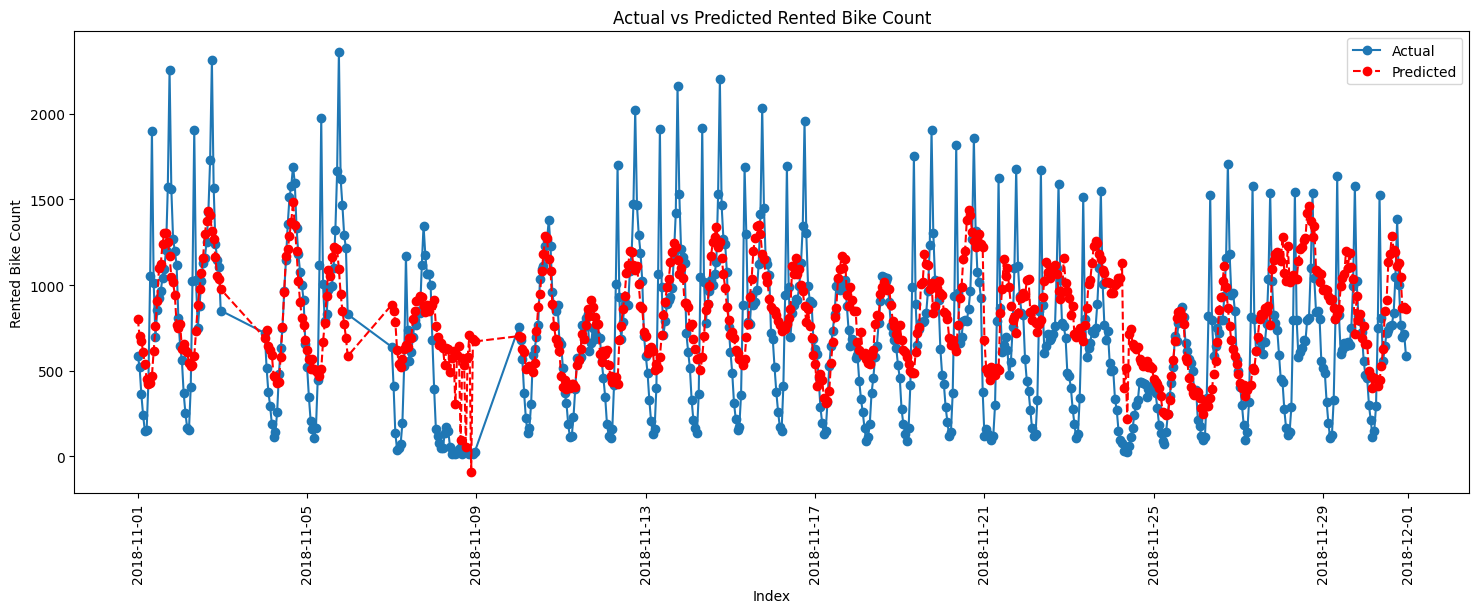

In [40]:
# prompt: test 데이터셋의 실제값과 예측된 값을 plot함수를 이용하여 그래프를 그리되, X축은 index값으로 하여 그래프를 그리는 코드를 제공해주세요.

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous code

# Create the plot
plt.figure(figsize=(18, 6))
plt.plot(y_test.index, y_test.values, marker='o', label='Actual')
plt.plot(y_test.index, y_pred, marker='o', linestyle='dashed', color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count')
plt.legend()
#plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# 2. Lasso Regression 모델 적용

Lasso Regression Performance:
Mean Absolute Error (MAE): 275.7671821914066
Mean Absolute Percentage Error (MAPE): 1.178176897258494
Mean Squared Error (MSE): 149341.60196769628
Root Mean Squared Error (RMSE): 386.4474116457455
R-squared (R2): 0.28012743469780477


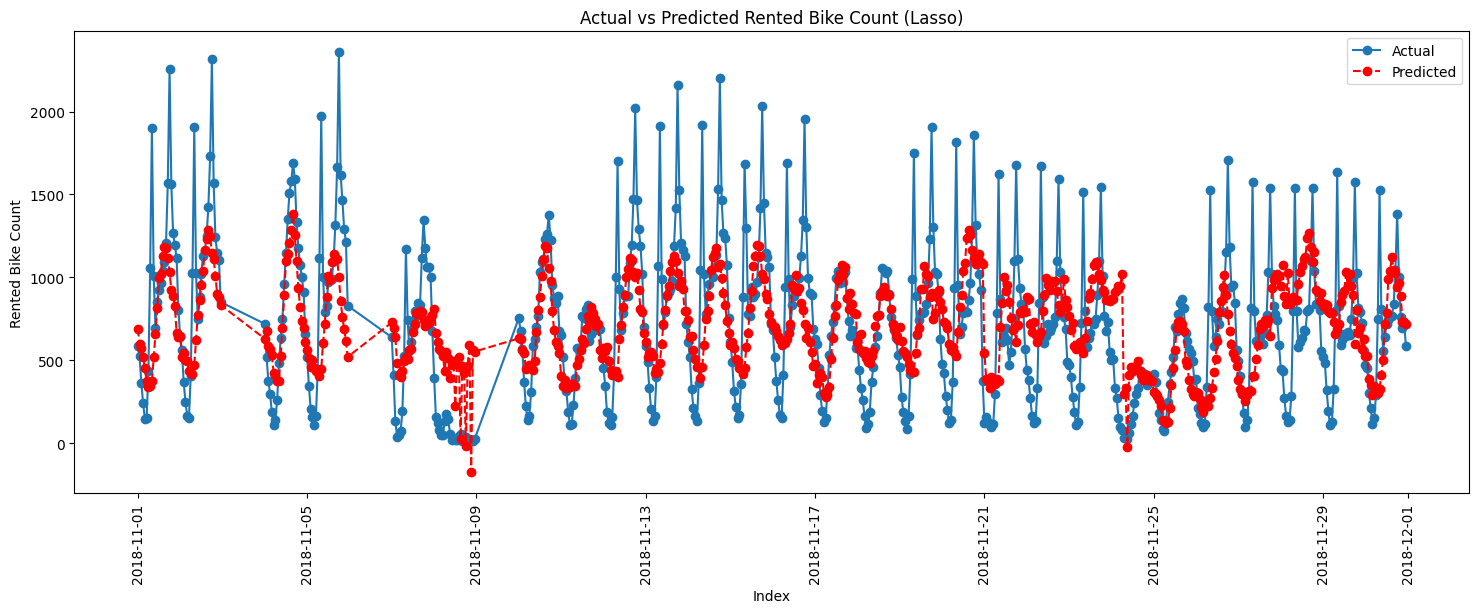

In [48]:
# prompt: scikit-learn에서 제공하는 LASSO regression을 이용하여 train 데이터셋에 대해 모형을 학습시키고, test 데이터셋에 대해 예측 성능을 평가하되, 성능평가지표는 MAE, MAPE, MSE, RMSE 값과 R^2 값을 산출할 수 있는 코드를 제공해주세요.

from sklearn.linear_model import Lasso

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=5)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics for Lasso
print(f"Lasso Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"R-squared (R2): {r2_lasso}")

# Create the plot for Lasso
plt.figure(figsize=(18, 6))
plt.plot(y_test.index, y_test.values, marker='o', label='Actual')
plt.plot(y_test.index, y_pred_lasso, marker='o', linestyle='dashed', color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count (Lasso)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# 3. Ridge Regression 모델 적용

Ridge Regression Performance:
Mean Absolute Error (MAE): 286.8165070579977
Mean Absolute Percentage Error (MAPE): 1.3158640803307442
Mean Squared Error (MSE): 151113.07885638654
Root Mean Squared Error (RMSE): 388.7326573062605
R-squared (R2): 0.2715883699266176


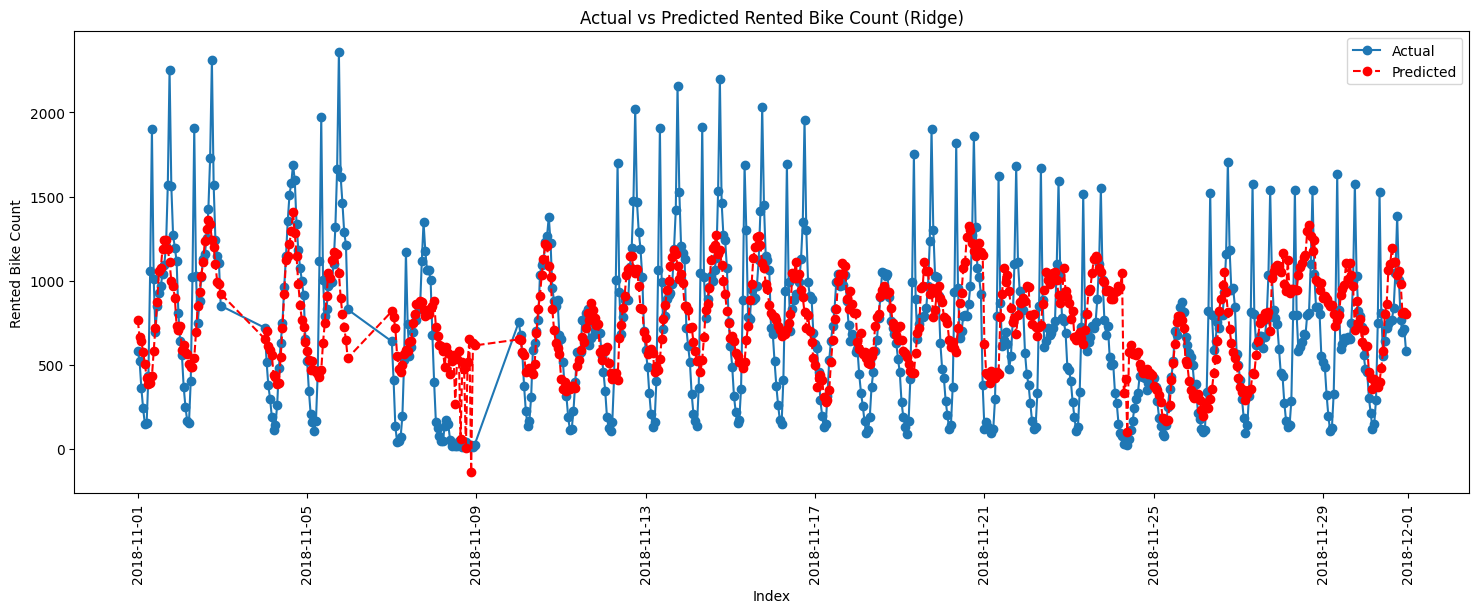

In [60]:
# prompt: scikit-learn에서 제공하는 Ridge regression을 이용하여 train 데이터셋에 대해 모형을 학습시키고, test 데이터셋에 대해 예측 성능을 평가하되, 성능평가지표는 MAE, MAPE, MSE, RMSE 값과 R^2 값을 산출할 수 있는 코드를 제공해주세요.

from sklearn.linear_model import Ridge

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=100)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics for Ridge
print(f"Ridge Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R-squared (R2): {r2_ridge}")

# Create the plot for Ridge
plt.figure(figsize=(18, 6))
plt.plot(y_test.index, y_test.values, marker='o', label='Actual')
plt.plot(y_test.index, y_pred_ridge, marker='o', linestyle='dashed', color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count (Ridge)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

k-Nearest Neighbors Regression Performance:
Mean Absolute Error (MAE): 293.25324074074075
Mean Absolute Percentage Error (MAPE): 1.2343773597169392
Mean Squared Error (MSE): 146755.67896122686
Root Mean Squared Error (RMSE): 383.08703836233724
R-squared (R2): 0.29259238086025297


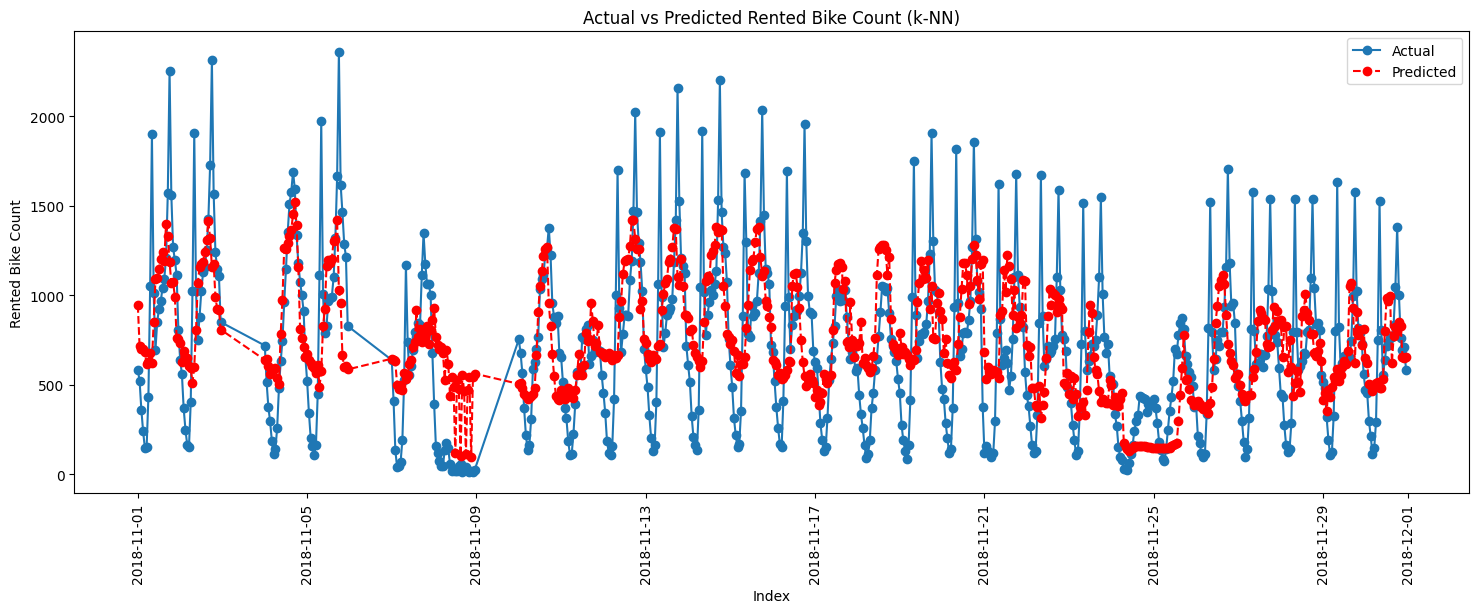

In [80]:
# prompt: scikit-learn에서 제공하는 k nearest neighbor를 이용하여 train 데이터셋에 대해 모형을 학습시키고, test 데이터셋에 대해 예측 성능을 평가하되, 성능평가지표는 MAE, MAPE, MSE, RMSE 값과 R^2 값을 산출할 수 있는 코드를 제공해주세요.

from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the k-nearest neighbors model
knn_model = KNeighborsRegressor(n_neighbors=80)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the k-NN model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics for k-NN
print(f"k-Nearest Neighbors Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"R-squared (R2): {r2_knn}")

# Create the plot for k-NN
plt.figure(figsize=(18, 6))
plt.plot(y_test.index, y_test.values, marker='o', label='Actual')
plt.plot(y_test.index, y_pred_knn, marker='o', linestyle='dashed', color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count (k-NN)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

ElasticNet Regression Performance:
Mean Absolute Error (MAE): 280.1791774532207
Mean Absolute Percentage Error (MAPE): 1.250162600389791
Mean Squared Error (MSE): 148769.45758024263
Root Mean Squared Error (RMSE): 385.7064396406192
R-squared (R2): 0.28288534704434976


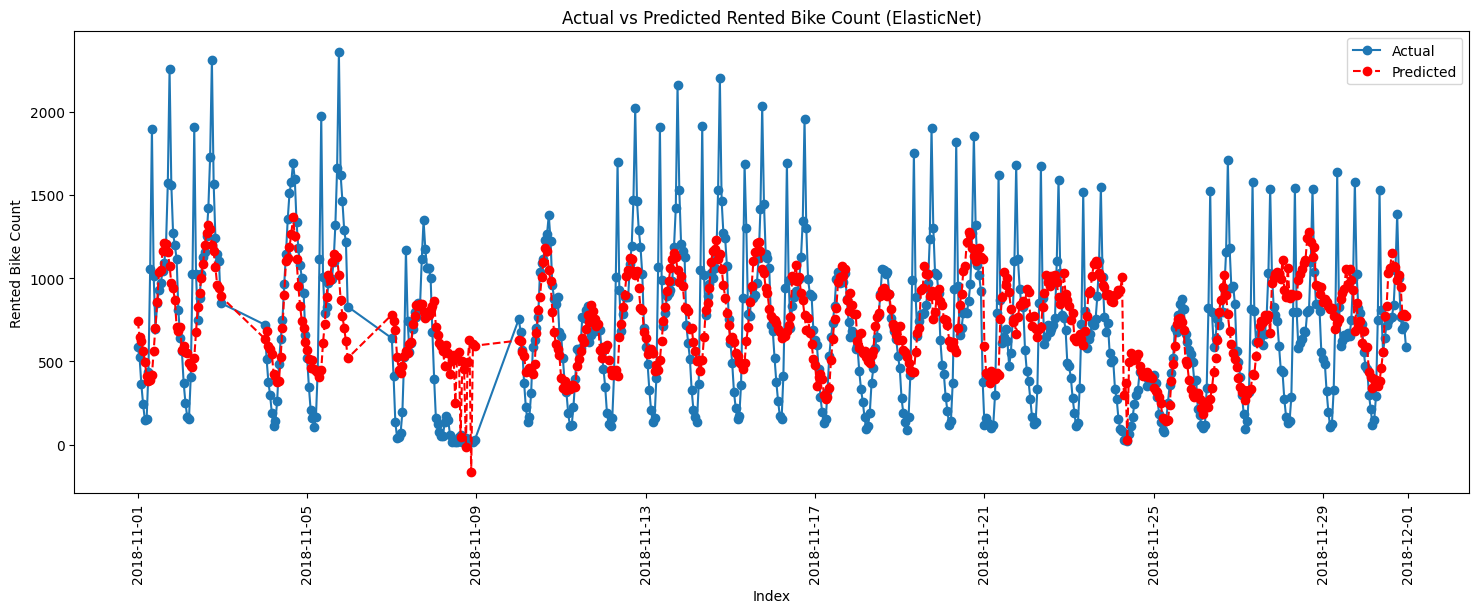

In [69]:
# prompt: scikit-learn에서 제공하는 ElasticNet regression을 이용하여 train 데이터셋에 대해 모형을 학습시키고, test 데이터셋에 대해 예측 성능을 평가하되, 성능평가지표는 MAE, MAPE, MSE, RMSE 값과 R^2 값을 산출할 수 있는 코드를 제공해주세요.

from sklearn.linear_model import ElasticNet

# Initialize and train the ElasticNet regression model
elastic_net_model = ElasticNet(alpha=0.05, l1_ratio=0.5)  # You can adjust alpha and l1_ratio
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate the ElasticNet model
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
mape_elastic_net = mean_absolute_percentage_error(y_test, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

# Print the evaluation metrics for ElasticNet
print(f"ElasticNet Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_elastic_net}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_elastic_net}")
print(f"Mean Squared Error (MSE): {mse_elastic_net}")
print(f"Root Mean Squared Error (RMSE): {rmse_elastic_net}")
print(f"R-squared (R2): {r2_elastic_net}")

# Create the plot for ElasticNet
plt.figure(figsize=(18, 6))
plt.plot(y_test.index, y_test.values, marker='o', label='Actual')
plt.plot(y_test.index, y_pred_elastic_net, marker='o', linestyle='dashed', color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count (ElasticNet)')
plt.legend()
plt.xticks(rotation=90)
plt.show()